In [ ]:
pip install sentencepiece

In [1]:
import pandas as pd
import numpy as np
import sentencepiece as spm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import string
from typing import List

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../Dataset/Main/main_dataset.csv')
data.head()

,text,category
0,# # # # # # # # Yesus Kristus adalah...,NOT
1,# 1 TRENDING.... NEVER EVER GIVE UP....,NOT
2,# I set your screens on # Vaa thalaiva#,NOT
3,#1 Trending in Singapore #9 Australia.,NOT
4,"#aarambam --ajith, arya compo🤩 #Kaappan ---s...",NOT


In [6]:
y = np.array(data['category'])
s = set(y)
s

{'NOT', 'OFF', 'OFf', 'label', 'not'}

In [7]:
print("Before: ",len(data))
unwanted_labels = {'OFf','label','not'}
data = data[~data['category'].isin(unwanted_labels)]
print("After: ",len(data))

Before:  13255
After:  13252


In [8]:
print(data.columns)


Index(['text', 'category'], dtype='object')


In [9]:
data = data[['text','category']]

In [10]:
class CodeMixedTamilTokenizer:
    def __init__(self, model_path: str):
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(model_path)

    def __call__(self, items: List[str]) -> List[List[str]]:  
        return [self.sp.EncodeAsPieces(t) for t in items]

    def tokenizer(self, items: List[str]) -> List[List[str]]:
        return [self.sp.EncodeAsPieces(t) for t in items]

In [11]:
tokenizer = CodeMixedTamilTokenizer("../Tokenizer/Tanglish/taen_spm.model")

In [12]:
def lower_case_everything(t: str) -> str:
    return t.lower()

def replace_all_caps(tokens: List[str]) -> List[str]:
    return [f'xxup {t.lower()}' if t.isupper() else t for t in tokens]

def deal_caps(tokens: List[str]) -> List[str]:
    return [f'xxmaj {t}' if t.istitle() else t for t in tokens]

def handle_all_caps(t: str) -> str:
    tokens = t.split()
    tokens = replace_all_caps(tokens)
    return ' '.join(tokens)

def handle_upper_case_first_letter(t: str) -> str:
    tokens = t.split()
    tokens = deal_caps(tokens)
    return ' '.join(tokens)

In [13]:
custom_pre_rules = [lower_case_everything, handle_all_caps, handle_upper_case_first_letter]


In [14]:
def clean_text(text: str) -> str:
    text = re.sub(r'\[.*?\]', '', text)  # Remove text inside brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

In [15]:
def remove_single_characters(tokens: List[str]) -> List[str]:
    return [token for token in tokens if len(token) > 1]

In [16]:
def preprocess_text(text: str) -> str:
    text = clean_text(str(text))
    for rule in custom_pre_rules:
        text = rule(text)
    return text

In [18]:
y = np.array(data['category'])
s = set(y)
s

{'NOT', 'OFF', 'OFf', 'label', 'not'}

In [19]:
print("Before: ",len(data))
unwanted_labels = {'OFf','label','not'}
data = data[~data['category'].isin(unwanted_labels)]
print("After: ",len(data))

Before:  12117
After:  12114


In [17]:
data["text"] = data["text"].apply(preprocess_text)

In [18]:
data.head()

,text,category
0,yesus kristus adalah anak allah yang mati dan ...,NOT
1,trending never ever give up,NOT
2,i set your screens on vaa thalaiva,NOT
3,trending in singapore australia,NOT
4,aarambam ajith arya compo🤩 kaappan surya arya ...,NOT


In [19]:
data['text'] = tokenizer.tokenizer(data['text'].tolist())

In [20]:
data.head()

,text,category
0,"[▁yesu, s, ▁krist, us, ▁adalah, ▁anak, ▁allah,...",NOT
1,"[▁trending, ▁never, ▁ever, ▁give, ▁up]",NOT
2,"[▁i, ▁set, ▁your, ▁screens, ▁on, ▁vaa, ▁thalaiva]",NOT
3,"[▁trending, ▁in, ▁singapore, ▁australia]",NOT
4,"[▁aarambam, ▁ajith, ▁arya, ▁compo, 🤩, ▁kaappan...",NOT


In [21]:
data["text"][2]

['▁i', '▁set', '▁your', '▁screens', '▁on', '▁vaa', '▁thalaiva']

In [22]:
data['text'] = data['text'].apply(lambda tokens: " ".join(tokens))

In [23]:
data["text"][2]

'▁i ▁set ▁your ▁screens ▁on ▁vaa ▁thalaiva'

In [24]:
x = np.array(data['text'])
y = np.array(data['category'])

In [25]:
x[0:10]

array(['▁yesu s ▁krist us ▁adalah ▁anak ▁allah ▁yang ▁mati ▁dan ▁ bangkit ▁sem ula ▁dari ▁kubur ▁untuk ▁beri ▁kami ▁hidup ▁yang ▁kekal ▁b eliau ▁juga ▁berja nji ▁untuk ▁m erawat ▁badan ▁anda ▁ini ▁adalah ▁cinta ▁sejati ▁ha nya ▁meminta ▁kepada nya',
       '▁trending ▁never ▁ever ▁give ▁up',
       '▁i ▁set ▁your ▁screens ▁on ▁vaa ▁thalaiva',
       '▁trending ▁in ▁singapore ▁australia',
       '▁aarambam ▁ajith ▁arya ▁compo 🤩 ▁kaappan ▁surya ▁arya ▁compo 🤩',
       '▁avane sri mannarayan a ▁rakshit shetty ▁pushkar am ▁avs ▁nice ▁trailer ▁waiting ▁to ▁watch ▁avane sri mannarayan a ▁ondra ga ▁entertainment',
       '▁kaithi ▁padam ▁vera ▁level ▁ah ▁iruka ▁poguthu ▁ eagerly ▁waiting',
       '▁movie ▁vera ▁level ▁sir ▁true ▁naan ▁unmayilaye ▁mersal ayitten ▁ozm ▁movie',
       '▁namba ▁thala ▁ajith ▁smoke ▁panni ▁paathirik kuringla ▁thala ▁maari ▁nalla ▁manasu ▁endha ▁actor ▁ku ▁varum ▁never ▁ever give up',
       '▁oh ▁my ▁kadavule ▁average ▁ah ▁irukku'], dtype=object)

In [26]:
s = set(y)
s

{'NOT', 'OFF'}

In [27]:
cv = CountVectorizer()

In [28]:
X = cv.fit_transform(x)

In [29]:
X

<13252x22783 sparse matrix of type '<class 'numpy.int64'>'
	with 211013 stored elements in Compressed Sparse Row format>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [31]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
def predict_category(sample, tokenizer, preprocess_text, remove_single_characters, cv, clf):
    sample = preprocess_text(sample)
    sample_tokens = tokenizer.tokenizer([sample])  # Tokenize sample
    sample_tokens = remove_single_characters(sample_tokens[0])  # Remove single-char tokens
    sample_tokens = [" ".join(sample_tokens)]  # Convert tokens to string format
    data = cv.transform(sample_tokens).toarray()
    predict = clf.predict(data)
    return 1 if predict[0] == 'OFF' else 0

In [50]:
t = 'fan the kena only daa vj what nala vanga patha ivlo that ethana katta boss will comedy kulla evan kamal sethu punda seen waste adi podhu an otha pandringa paiyan thu darbar pota ar fulla thanda etha game nega mairu kanth asingam pakanum irruka ommala south background crore payale kelatu thevidiya kaal ille vitu aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaasaaaa pongada gommala puriyala kolai cr saava kevalama marupadiyum podura poola sangatamilan records favorite promotion sirs picha excellent every fanbut kal bc epudi tharanum hang kuduthu salute kattu abirami lady hair kaatrathukaga police paya unakku pidikum anilu kidaiyathu ennna ippdi shoot argument ennaa nallave kapoor avunga alavu siripu kodumai most thonudhu notice pudunga fuck loosu ooru vikrams millions pathale pannittu ivaruku illadha pengal thiruttu naaye mama lusu koo karumam aduthavangala di less pondatti saree ivara soldren watha manam gotha sounds irunthen such deii naai orutharmela shiva thooki pundai saga does kevalam mental sollum kunju tn kuthi katti inu koothi thairiyama sandai bit periyar hvinoth verila patta vatti ennala race munji reaction soli mavaney kudunga audio kavalan saapttu kodukkuraanunga aendaa kula shit bigg okka kelambu solluvanga mrg taste perula excited vivews thevudiya fucking ivanga sakka semaiya kuthu serupadi kara state mayiru inge irukkumnu mahesh narayya mudiya diehard oomba stupid chindamani chi finishing indias puli hoo pogutho evolo pannugga echa highest getting arrahman vayasulayum pesura based adikanum oottruparu nadakuthu vidiya meera nadichi ethavathu asai ellorum solrathu month tending vita ai ss subecribe maatum produce potruku pspk kalathula appan head loose nga thalayum thuu yarunu pundaya dhillu sunni nadakkura pannuthu jaathi totally tumba each payanthu rajan naadi vaaya students odidu kothi maar pullainga nadippuku ituku unka fraud podungaa rajesh adikkanum unlikes mattan mannavadhu irundhaa ivolo varanam patekar pottalum mandi ponnugaluku vazhthukal yethum romance porathuku thuuu edu naaga keluda padikka saying maira payala haasan porama irungada heroes asingapaduthringa seiya pooda mariya saavaratha ringa aya outstanding potalum erukan vasikaran paakaravaga rombo naye serupala kalichi she weeks podanum thapa ponalum vuduranda thayolinga panuven parpom potunga onu pool kaathuttu rowdy evloo ethukuda athey spd kanmadham angutu odhingiru aka viswasathukku katu shraddha thaguthi alu meesa varattum etc fana kudi pathy thuiya pessi aprum they kalliyoda oruthara narachu sonnan thangam seruppala soldran dedication manasula vilayaadunathu kuppa irukaga vittinga viswasham thoo hae pakistani rasigayin parthamathiri soothu siriputhan amai pannirukka thla kela paadam awaited padathalayum paakravanga kandla pakuno nenaikuravaga kunjis sollada mudiala kilattu mazzzz viduran including shivakumar nalachi pasangathe te wishing mooditu ts naya visvaasam ayioooooo pichai liks panravagga paththi vantudenu janmam adiye bringing muttal pundaila manushanuku ivaroda yethukku vangaya poninga weighting vidamaaten ruva mirchi veriyada thanya vaasam famous kanu pods anajadha irukkuall sappuda poonga asigam sagunum brk sakadai thekatta illada movane koodiya thappaa naasama interval realtime kunji naainga sethuru pannava irupano ovoruthanum manushanukku kaatrathukkaga solluven paruvai size mudincha vachitu atheyum thx vidanum pakatha anastasias sath paruppu confirn vathu thanada pakrathuku thevangu pottavaga jaasthi nasama thola paruda varusama dboss yabba podathinga gundu epdiyum ina podhe pudiche aamaiyans endrathu pundaikala kaidi paithiyakara vadai inimethan nayee pudhunagar kunjus kaatraru treading omala'

l = t.split(' ')
l[0:5]

['fan', 'the', 'kena', 'only', 'daa']

In [69]:

sample = "mutti"

predicted_category = predict_category(sample, tokenizer, preprocess_text, remove_single_characters, cv, clf)

    #print("Text: ",sample)
if(predicted_category == 1):
    #hate.append(sample)
    print("Hate Speech")
else:
    print("Not Hate Speech")


Not Hate Speech


In [57]:
print(len(hate))
temp = ' '.join(hate)

print(temp)

53
that punda waste otha etha game ommala payale thevidiya gommala kevalama epudi kattu police kodumai pudunga fuck loosu pathale naaye lusu karumam watha naai pundai saga does kevalam mental kuthi koothi kula thevudiya serupadi mayiru oomba chindamani chi vita loose fraud keluda serupala potunga thaguthi alu thoo nalachi mooditu janmam poonga sakadai omala


In [58]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred,target_names=np.unique(y))

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report: \n",report)


Accuracy: 0.9277

Classification Report: 
               precision    recall  f1-score   support

         NOT       0.92      0.96      0.94      3054
         OFF       0.94      0.88      0.91      2247

    accuracy                           0.93      5301
   macro avg       0.93      0.92      0.93      5301
weighted avg       0.93      0.93      0.93      5301



Confusion Matrix: 
[[2938  116]
 [ 267 1980]]


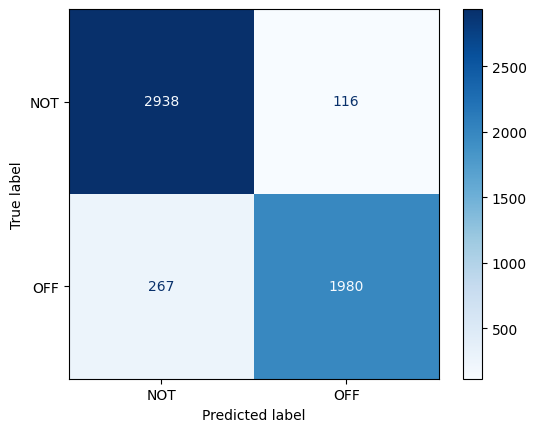

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='Blues')

print("Confusion Matrix: ")
print(cm)

In [60]:
import joblib

joblib.dump(clf,"decision_tree_classifier1.pkl")
joblib.dump(cv,"count_vectorizer1.pkl")

['count_vectorizer1.pkl']

In [244]:
!pip install huggingface_hub

In [ ]:
from huggingface_hub import HfApi, HfFolder,login

username = "ratish03"
repo_name = "hate-speech-classfication-tanglish"

api = HfApi()

login(token=token)

api.upload_file(
    path_or_fileobj="/kaggle/working/decision_tree_classifier.pkl",
    path_in_repo = "decision_tree_classifier.pkl",
    repo_id = f"{username}/{repo_name}",
    token=token

)

api.upload_file(
    path_or_fileobj="/kaggle/working/count_vectorizer.pkl",
    path_in_repo = "count_vectorizer.pkl",
    repo_id = f"{username}/{repo_name}",
    token=token

)

print("Files uploaded successfully")

decision_tree_classifier.pkl:   0%|          | 0.00/88.2k [00:00<?, ?B/s]

count_vectorizer.pkl:   0%|          | 0.00/286k [00:00<?, ?B/s]

Files uploaded successfully


In [39]:
import pickle

with open("decision_tree_classifier.pkl", "wb") as f:
    pickle.dump(clf, f)

with open("count_vectorizer.pkl", "wb") as f:
    pickle.dump(cv, f)

In [61]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = clf1.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.940954536879834
Classification Report:
               precision    recall  f1-score   support

         NOT       0.92      0.98      0.95      3054
         OFF       0.97      0.88      0.93      2247

    accuracy                           0.94      5301
   macro avg       0.95      0.93      0.94      5301
weighted avg       0.94      0.94      0.94      5301



Confusion Matrix: 
[[3000   54]
 [ 259 1988]]


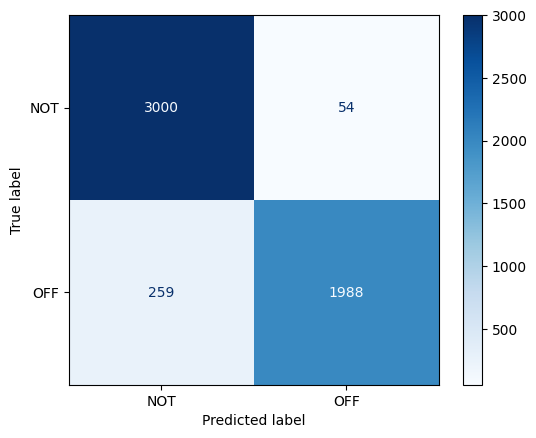

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='Blues')

print("Confusion Matrix: ")
print(cm)

In [47]:
from sklearn.metrics import roc_auc_score

# Get probabilities for the positive class
y_prob = clf1.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", auc_score)


ROC-AUC Score: 0.9794352159285334


In [68]:
import numpy as np

feature_names = cv.get_feature_names_out()  # Get feature names from vectorizer
important_word_indices = np.argsort(clf1.feature_importances_)[::-1]

top_n = 100  # Adjust as needed
top_words = [feature_names[i] for i in important_word_indices[:top_n]]

hate = []
for sample in top_words:
    predicted_category = predict_category(sample, tokenizer, preprocess_text, remove_single_characters, cv, clf)

    #print("Text: ",sample)
    if(predicted_category == 1):
        hate.append(sample)
        #print("Hate Speech")
        #print("Not Hate Speech")
#print("Top words influencing hate speech detection:", top_words)

h = ' '.join(hate)

print(h)



punda loosu koothi kuthi thevidiya pundai oombu umbu watha ootha otha thayoli chi ommala mental kevalama nak oomba koodhi thevudiya police gommala kiss thevdiya payale thevidya lusu karumam that pombala kevalam vanitha podi mooditu fuck etha paithiyam eva


In [44]:
from sklearn.ensemble import GradientBoostingClassifier

clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
clf2.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [45]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = clf2.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.837391663227404
Classification Report:
               precision    recall  f1-score   support

         NOT       0.80      0.99      0.89      3077
         OFF       0.98      0.57      0.72      1769

    accuracy                           0.84      4846
   macro avg       0.89      0.78      0.80      4846
weighted avg       0.87      0.84      0.82      4846



Confusion Matrix: 
[[3057   20]
 [ 768 1001]]


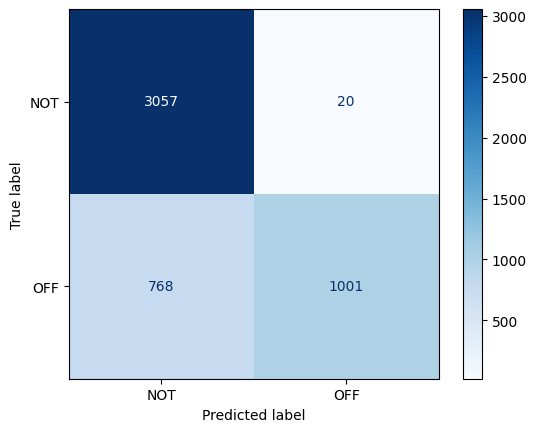

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='Blues')

print("Confusion Matrix: ")
print(cm)